# A functional Python environment for data science

Lino Galiana  
2024-12-04

<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Objective of This Chapter
</div>
</div>

-   Expose the issues related to the modularity of `Python`;
-   Introduce the daily working environment of *data scientists*, namely the *notebook*;
-   Illustrate the use of *notebooks* within the framework of this course;
-   Present the approach to take when encountering an error;
-   Understand the importance of ongoing training in `Python` and discover some good resources for it.

</div>
</div>

# 1. Introduction

The richness of *open-source* languages comes from the ability
to use *packages*
developed by specialists. `Python` is particularly
well-endowed in this area. To caricature, it is sometimes said
that `Python` is the second-best language for all tasks, which makes it the best language.

Indeed, the malleability of `Python` means that it can be
approached in very different ways
depending on whether you are a *SysAdmin*, a web developer, or a
*data scientist*. It is this latter profile that will interest us here.

However, this richness poses a challenge when starting to
learn `Python` or reusing code
written by others. Proprietary statistical
languages operate in a *top-down* model, where, once a license is acquired,
you simply install the software and follow the documentation provided by
the developing company to proceed. In *open source* languages, the approach is more *bottom up*: the ecosystem is enriched by contributions and documentation from various sources. Several ways of doing the same thing coexist, and it is part of the work to take the time to choose the best approach.

There are primarily two ways to use `Python` for *data science*[1]:

1.  **Local installation**: [Install the `Python` software](https://www.python.org/downloads/) on your machine, configure a suitable environment (usually via [`Anaconda`](https://www.anaconda.com/download)), and use a development tool, such as [`Jupyter`](https://jupyter.org/) or [`VSCode`](https://code.visualstudio.com/), to write and execute `Python` code. We will revisit these three levels of abstraction in the next section.
2.  **Using an online environment**: Access a preconfigured `Python` environment via your browser, hosted on a remote machine. This machine will execute the code you edit from your browser. This method is particularly recommended for beginners or for those who do not want to deal with system configuration.

The second approach is related to *cloud* services. In the context of this course, as will be explained later, we offer two solutions: `SSPCloud`, a *cloud* developed by the French administration and provided free of charge to students, researchers, and public officials, or `Google Colab`.

The two methods are briefly described below. The local installation method is presented to introduce useful concepts but is not detailed as it can be complex and prone to configuration issues. If you choose this route, be prepared to encounter technical difficulties and sometimes obscure configurations, often requiring tedious searches to resolve problems that you would probably not have encountered in an online environment.

# 2. Ingredients for a functional `Python` environment

As mentioned earlier, using `Python` locally for data science relies on three main elements: the `Python` interpreter, a virtual environment, and an integrated development environment (IDE). Each of these components plays a complementary role in the development process.

## 2.1 `Python` Interpreter

This refers to the programming language itself. Installing `Python` on your machine is the essential first step, as it provides the interpreter needed to run your `Python` code. At this stage, it is only the base language and a command-line tool.

<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Illustration
</div>
</div>

If you have access to a command line in an environment where `Python` is available and properly configured (including being added to the [`PATH`](https://en.wikipedia.org/wiki/Environment_variable#%3CPATH%3E_for_executable_locations)), you can already run `Python` through the command line[2]

``` python
python --version
python -c "print(3+3)"
echo "print(3+3)" > example.py && python example.py && rm example.py
```

Line 3  
An example of creating a file `example.py` from the command line and using it from the command line. Since creating files from the command line is not a realistic working mode, we will explain how to create files using a text editor.

</div>
</div>

## 2.2 `Python` Environment

The `Python` language is built, like other open-source languages, with a basic core and additional packages. It is these packages that form the rich and dynamic ecosystem of `Python`, making it such a comfortable language.

`Python` is an open-source language, which means that anyone can offer their code for reuse in the form of a package. There are platforms that centralize community packages, with the main one in the `Python` ecosystem being [`PyPI`](https://pypi.org/).

An environment refers to the collection of packages available to `Python` for performing specific tasks. `Python` is not installed with all the packages available on [`PyPI`](https://pypi.org/), so it is up to you to enrich your environment by installing new packages as needed.

If your `Python` is correctly configured, you can install new packages using `pip install`[3]. We will use many packages in this course, so this command will come up regularly.

Once installed, a script must declare a package before using it (otherwise `Python` won’t know where to find specific functions). This is the purpose of the `import` command. For example, `import pandas as pd` allows you to use the `Pandas` package (provided it is already installed).

<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Illustration
</div>
</div>

Here is an illustration of how package management works in `Python`

``` python
python -c "import geopandas as gpd"
pip install geopandas
python -c "import geopandas as gpd ; print(gpd.GeoDataFrame)"
```

Line 1  
This should cause an error if `GeoPandas` is not installed
`ModuleNotFoundError: No module named 'geopandas'`

Line 3  
The error should be gone

</div>
</div>

<div class="callout callout-style-default callout-important callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Important
</div>
</div>

It is discouraged to use global imports like `from pkg import *`. For example, consider two modules that provide a `sqrt` function:

</div>
</div>

``` python
# Don't do that please !
from numpy import *
from math import *

sqrt([4, 3])
```

Global imports load all functions and variables from the `numpy` and `math` modules into the global namespace, which can lead to naming conflicts.

First, this can lead to unpredictable results, as if the implementations differ, how do you know whether it’s the `numpy` or `math` package function that was used? Here, it will be the `math` package function, imported last, which will cause an error: the `math` module only handles integers, not vectors, unlike `numpy`.

Second, it makes the code less readable, as it becomes difficult to know where each function or variable used comes from, complicating maintenance and debugging.

It is therefore preferable to import only the necessary functions or use explicit aliases, such as `import numpy as np` and `import math`, to avoid these issues.

``` python
import numpy as np
from math import sqrt

np.sqrt([3, 4])
sqrt(3)
```

### 2.2.1 Development environments and notebooks

Using `Python` via the command line is fundamental in the application world. However, it’s impractical to write your code directly in the command line on a daily basis. Fortunately, there are suitable editors known as IDEs. These are software that provide a convenient interface for writing and executing your code. They offer features to simplify code reading and writing: syntax highlighting, autocompletion, debugging, formal code quality diagnostics, etc.

`Jupyter` notebooks[4] offer an interactive interface that allows you to write `Python` code, test it, and see the result below the instruction rather than in a separate console. `Jupyter` notebooks are essential in the fields of data science and education and research because they greatly simplify exploration and experimentation.

They allow you to combine text in `Markdown` format (a lighter markup text format than `HTML` or $\LaTeX$), `Python` code, and `HTML` code for visualizations and animations in a single document.

<figure>
<img src="https://python.sdv.u-paris.fr/img/jupyter-exemple.png" alt="Illustration of a Jupyter notebook concept. Source: Python Course for Life Sciences (Paris 18) by Patrick Fuchs and Pierre Poulain" />
<figcaption aria-hidden="true">Illustration of a Jupyter notebook concept. Source: <a href="https://python.sdv.u-paris.fr/">Python Course for Life Sciences (Paris 18) by Patrick Fuchs and Pierre Poulain</a></figcaption>
</figure>

Initially, `Jupyter` was the only software offering these interactive features. Now, there are other ways to benefit from notebook advantages while having an IDE with more comprehensive features than `Jupyter`. For this reason, as of 2024, it is more practical to use `VSCode`\[^vscode-python\], a general-purpose code editor but offering excellent features in `Python`, than `Jupyter`. For more information on using notebooks in VSCode, refer to the [official documentation](https://code.visualstudio.com/docs/datascience/jupyter-notebooks).

# 3. Using notebooks in the context of this course

The best way to learn `Python` or notebooks is through practice, so all chapters of this course will be executable in notebook format. The following buttons allow you to open this chapter in notebook format in different environments:

<div class="badge-container"><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/getting-started/01_environment.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«01_environment»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/getting-started%2001_environment%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=visualstudiocode&logoColor=blue" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«01_environment»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/getting-started%2001_environment%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks//en/blob/main//notebooks/en/getting-started/01_environment.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

1.  On `Github` , only for viewing and downloading notebooks as `Github` is not a development and execution environment for notebooks;
2.  On [`SSPCloud`](https://datalab.sspcloud.fr/home), a modern cloud platform developed by [Insee](https://www.insee.fr/fr/accueil) and provided free of charge to public agents, students, researchers, and agents of European public statistical institutes. As mentioned in the dedicated box, this is the recommended entry point for notebooks for anyone who has access to it. Notebooks can be opened there via `VSCode` (recommended approach) or `Jupyter`, with command-line access and appropriate rights for package installation guaranteed in both interfaces. In addition to these already desirable features for discovering `Python`, other useful features for continuous learning are explored in more detail in the third year in the course on [“Deploying Data Science Projects”](https://ensae-reproductibilite.github.io/website/): free GPU access, interfacing with other cloud technologies such as object storage systems, etc.
3.  [Google Colab](https://colab.google/) is a free online service based on the `Jupyter` interface that provides access to `Python` resources run on Google’s servers.

<div class="callout callout-style-default callout-important callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Recommended environment for this course
</div>
</div>

For public sector employees or students from partner schools, it is recommended to use the `SSPCloud` button, which is a modern, powerful, and flexible cloud infrastructure developed by Insee and accessible at [https://datalab.sspcloud.fr](https://datalab.sspcloud.fr/home)[5].

As mentioned, `VSCode` is a much more complete environment than `Jupyter` for using notebooks.

</div>
</div>

# 4. Exercise to Explore Basic Notebook Features

All the chapters of this course are designed as a narrative aiming to address a problem with intermediate exercises serving as milestones. They are easily identifiable in the following format:

<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Exercise
</div>
</div>

An example of an exercise box

</div>
</div>

The following exercise aims to familiarize you with using `Jupyter` notebooks in `Python` if you are not familiar with this environment. It illustrates basic features such as writing code, executing cells, adding text, and visualizing data.

To do this, open this chapter in a notebook-compatible environment: [6]

<div class="badge-container"><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/getting-started/01_environment.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«01_environment»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/getting-started%2001_environment%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=visualstudiocode&logoColor=blue" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«01_environment»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/getting-started%2001_environment%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks//en/blob/main//notebooks/en/getting-started/01_environment.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Exercise 1
</div>
</div>

1.  Under this exercise, create a code cell. Write a `Python` code that displays the phrase: *“Welcome to a notebook!”* and then execute the cell. Modify your code and re-run it.
2.  By searching online, add a new cell and change its type to “Markdown”. In this cell, write a short text including the following elements:
    -   A small part in italics
    -   An unordered list
    -   A level 2 heading (equivalent to `<h2>` in HTML or `\subsection` in $\LaTeX$)
    -   An equation
3.  Create a code cell anywhere in the document. Create a list of integers from 1 to 10 named `numbers`. Display this list.
4.  Create a new code cell. Use the code below this exercise to generate a figure.

</div>
</div>

The figure obtained at the end of the exercise will look like this:

[1] A third way to use `Python`, still under development, relies on a technology called *WebAssembly*. This approach allows executing `Python` code directly in the browser, offering a local execution experience without requiring complex installation.

[2] You do not have direct access to the command line with `Google Colab`, only indirectly through the notebook interface by prefixing commands with `!`. On `VSCode` services provided by `SSPCloud`, the recommended interface for this course, you can access a command line by clicking `☰ > Terminal > New Terminal`. On a personal installation of `VSCode`, this will be at the top in the `Terminal > New Terminal` menu.

[3] More details on environments are available in the 3rd-year course [“Deployment of Data Science Projects”](https://ensae-reproductibilite.github.io/website/), including different types of virtual environments (`conda` or `venv`) and their implications for `Python` computing chains.

[4] `Jupyter` originated from the `IPython` project, an interactive environment for `Python` developed by Fernando Pérez in 2001. In 2014, the project evolved to support other programming languages in addition to Python, leading to the creation of the Jupyter project. The name “Jupyter” is an acronym referring to the three main languages it supports: `Julia`, `Python`, and `R`. `Jupyter` notebooks are crucial in the fields of data science and education and research because they greatly simplify exploration and experimentation.

[5] For users of this infrastructure, the notebooks for this course are also listed, along with many other high-quality resources, on the [Training page](https://www.sspcloud.fr/formation).

[6] To use [https://datalab.sspcloud.fr](https://datalab.sspcloud.fr/home) if you are eligible, you need to create an account.

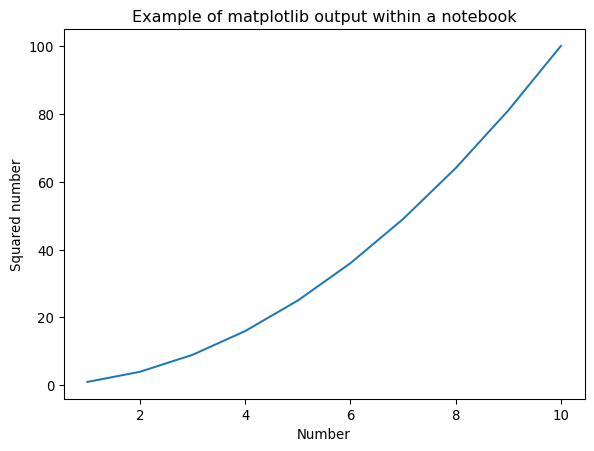

# 5. How to solve errors?

Encountering errors is completely natural and expected when learning (and even after!) a programming language. Resolving these errors is a great opportunity to understand how the language works and to become self-sufficient in its use. Here is a suggested sequence of steps to follow (in this order) to resolve an error:

1.  **Read the *logs* carefully**, i.e., the outputs returned by `Python` in case of an error. Often, they are informative and may contain the answer directly.
2.  **Search on the internet** (preferably in English and on `Google`). For example, providing the error name and part of the informative error message returned by `Python` usually helps to orient the search results towards what you are looking for.
3.  Often, the **search will lead you to the [Stackoverflow](https://stackoverflow.com/) forum**, which is designed for this purpose. If you really can’t find the answer to your problem, you can post on `Stackoverflow` by detailing the problem encountered so that forum users can reproduce it and find a solution.
4.  **Official documentation** (of `Python` and various packages) is often a bit dry but generally exhaustive. It helps to understand how to use the various objects. For example, for functions: what they expect as input, parameters and their types, what they return as output, etc.
5.  Code assistant AIs (`ChatGPT`, `Github Copilot`) can be very helpful. By providing them with appropriate instructions and verifying the generated code to avoid hallucinations, you can save a lot of time with these tools.

<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Exercise 2: Learning by Making Mistakes
</div>
</div>

Fix the cell below so that it no longer produces an error

</div>
</div>

In [8]:
pd.DataFrame(x)


# 6. How to continue learning after this course

## 6.1 Website content

This course is an introduction to data science with `Python`. Most of the content is designed for those who are new to the subject or wish to explore a specific topic in this field, such as NLP.

However, this course also reflects my nearly decade-long experience 👴 with `Python` on various data sources, infrastructures, and problems: it is thus somewhat editorialized (“*opinionated*” as the Anglo-Saxons would say) to highlight certain expectations for data scientists and to help you avoid the same pitfalls I encountered in the past.

This course also provides content to go beyond the first few months of learning. Not all the content on this site is taught; some advanced sections and even chapters are intended for continuous learning and can be used several months after discovering this course.

[pythonds.linogaliana.fr](https://pythonds.linogaliana.fr) is continuously updated to reflect the evolving `Python` ecosystem. The notebooks will remain available beyond the teaching semester.

## 6.2 Technical monitoring

The rich and thriving `Python` ecosystem means you must stay attentive to its developments to avoid becoming outdated. While with monolithic languages like `SAS` or `Stata` one could rely solely on official documentation without ongoing technical monitoring, this is not feasible with `Python` or `R`. This course itself is continuously evolving, which is quite demanding 😅, to keep up with the ecosystem changes.

Social networks like `LinkedIn` or `X`, and content aggregators like `Medium` or `Towards Data Science`, offer posts of varying quality, but maintaining continuous technical monitoring on these topics is not useless: over time, it can help identify new trends. The site `Real Python` generally provides very good posts, comprehensive and educational. `Github` can also be useful for technical monitoring: by looking at trending projects, you can see the trends that will emerge soon.

Regarding printed books, some are of very high quality. However, it is important to pay attention to their update dates: the rapid pace of some elements of the ecosystem can render them outdated very quickly. It is generally more useful to have a recent but non-exhaustive post than a complete but outdated book.

<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>

<div class="callout-title-container flex-fill">
Useful newsletters
</div>
</div>

There are many well-crafted newsletters for regularly tracking developments in the data science ecosystem. For me, they are the primary source of fresh information.

If you had to subscribe to only one newsletter, the most important to follow is Andrew Ng’s, [*“The Batch”*](https://www.deeplearning.ai/the-batch/). It provides reflections on academic advances in neural networks, evolution of the software and institutional ecosystem, making it an excellent *food for thought*.

The [*newsletter by Christophe Bleffari*](https://www.blef.fr/), aimed at data engineers but also of great interest to data scientists, often presents very good content. The [*newsletter by Rami Krispin (data scientist at Apple)*](https://www.linkedin.com/newsletters/7230119265956216833/) is also very useful, especially when working regularly with both `Python` and and `Quarto`, the reproducible publishing software.

Fairly technical, the videos by [Andrej Karpathy](https://www.youtube.com/andrejkarpathy?cbrd=1) (data scientist at OpenAI) are very informative for understanding the workings of state-of-the-art language models. Similarly, content produced by [Sebastian Raschka](https://magazine.sebastianraschka.com/?hide_intro_popup=true) helps in knowing the latest advancements in research on the topic.

General newsletters from [*Data Elixir*](https://dataelixir.com/) and [Alpha Signal](https://alphasignal.ai/) keep you updated with the latest news. In the field of data visualization, newsletters from [*DataWrapper*](https://blog.datawrapper.de/newsletter/) provide accessible content on the subject.

</div>
</div>